<a href="https://colab.research.google.com/github/SamOryeJack/Devops_Jenkins_Web_EC2/blob/main/Lab_08_Desmond_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-640: Lab 8

**Desmond, Paul**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (440 or 640) and by replacing "**Student Name**" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to download the `aitools` course package.

In [ ]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

Run the cells below to import the necessary tools for this assignment. No other import statements are required for this lab, and no other import statements should be included in this assignment.

In [ ]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

from aitools.algs import DPAgent, MCAgent, TDAgent
from aitools.envs import FrozenPlatform

## Mean Absolute Difference Function

In this assignment, you will explore the use of Monte Carlo control and Q-learning to find policies for the Frozen Platform environment. Recall that unlike Dynamic Programming techniques, these techniques are NOT allowed access to the MDP for the environment, which will inhibit their ability to learn an optimal policy.

Although our focus in this assignment will be on Monte Carlo and Q-Learning, we will also apply DP methods in each part of the assignment for the sake of evaluating the performance of the other techniques. Specifically, we will use value iteration to find an optimal policy for the environment, and we will then evaluate how close the policies found by MC control and Q-learning are to the optimal policy. We will do this by comparing the state value functions for the policies.

State value functions will be compared by calculating the "mean absolute difference" between their values. This is calculated by first determining the difference in the value functions for each state, calculating the absolute value of all of these differences, and then averaging the absolute values. A function named `mean_abs_difference()` has been provided to you for this purpose. This function has two parameters, each of which is expected to be a value function for a policy found by one of the RL agents. For example, if you wished to compare the value function for a policy found by a `DPAgent` named `dp` with the value function for a policy found by a `MCAgent` named `mc`, you could use the following code:

    mad = mean_abs_difference(dp.V, mc.V)

In [ ]:
def mean_abs_diff(v1, v2):
    states1 = set(v1.keys())
    states2 = set(v2.keys())

    abs_diff = [
        abs(v1.get(s,0) - v2.get(s,0))
        for s in states1.union(states2)
    ]

    return np.mean(abs_diff)

# Part 1: MC Policy Evaluation

In Part 1, you will study the effectiveness of Monte Carlo Policy evaluation. We will do this by first using Dynamic Programming to find an optimal policy. We will then use MC Policy evaluation to find several estimates of the state-value function for the optimal policy, comparing the results to the true state-value function found using Dynamic Programming.

## 1.A - Value Iteration

Create a 3x3 instance of the `FrozenPlatform` environment with `sp_range=[0, 0.4]`, a start position of 1 (which is the default), no holes, and with `random_state=1`.

Create an instance of the `DPAgent` class with `gamma=1` and `random_state=1` and use it to run value iteration to find the optimal policy for the environment.

Display the environment, setting `fill` to shade the the cells according to their value under the optimal policy, and set `contents` to display the optimal policy.


Value Iteration took 22 steps to converge.
Total time required was 0.01 seconds.


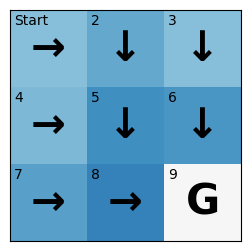

In [ ]:
fp = FrozenPlatform(rows=3, cols=3, sp_range=[0, 0.4], start=1, holes=0, random_state=1)

dp = DPAgent(env=fp, gamma=1, random_state=1)

dp.value_iteration()

fp.display(fill=dp.V, contents=dp.policy, size=1)

## 1.B - MC Policy Evaluation

In this step, you will apply 20 rounds of Monte Carlo policy evaluation, each consisting of 10,000 episodes. You will use `mean_abs_difference()` to measure the error in the estimate of the state-value function after each round.

Start by creating an instance of `MCAgent` class for the environment created in Step 1.A, using the optimal policy found using value iteration. Set `gamma=1` and `random_state=1`. Then create a `for` loop with 20 iterations, and that performs the following tasks in each iteration:

* Run Monte Carlo policy evaluation with 10,000 episodes. Use a learning rate of 0.001 (or `1e-3`) for the first 10 iterations of the loop, and 0.0001 (or `1e-4`) for the last 10 iterations. Otherwise use the default values.

* Calculate the mean absolute difference between the entries of the state-value array found by value iteration and the current estimate of the state-value array from the Monte Carlo policy evaluation.

* Print the following message, with the blanks filled with the appropriate values. Round the mean absolute difference to 2 decimal places.

        After ____ episodes, the mean absolute difference in V was ____.

In [ ]:
mc = MCAgent(env=fp, gamma=1, random_state=1, policy=dp.policy)

for i in range(20):
    alpha = 0.001 if i < 10 else 0.0001
    mc.evaluate_policy(episodes=10000, alpha=alpha, exploring_starts=False)

    mad = mean_abs_diff(dp.V, mc.V)
    print(f"After {((i+1)*10000)} episodes, the mean absolute difference in V was {mad:.2f}.")

After 10000 episodes, the mean absolute difference in V was 8.62.
After 20000 episodes, the mean absolute difference in V was 4.20.
After 30000 episodes, the mean absolute difference in V was 2.45.
After 40000 episodes, the mean absolute difference in V was 1.07.
After 50000 episodes, the mean absolute difference in V was 1.21.
After 60000 episodes, the mean absolute difference in V was 1.16.
After 70000 episodes, the mean absolute difference in V was 1.09.
After 80000 episodes, the mean absolute difference in V was 0.90.
After 90000 episodes, the mean absolute difference in V was 0.67.
After 100000 episodes, the mean absolute difference in V was 1.12.
After 110000 episodes, the mean absolute difference in V was 0.76.
After 120000 episodes, the mean absolute difference in V was 0.63.
After 130000 episodes, the mean absolute difference in V was 0.35.
After 140000 episodes, the mean absolute difference in V was 0.31.
After 150000 episodes, the mean absolute difference in V was 0.35.
Afte

## 1.C - History Plot

Instances of the `MCAgent` class have a `plot_v_history()` that generates a line plot showing how the state-value estimates for each state changed during Monte Carlo policy evaluation. This method is used in the cell below.

Replace the first blank in this cell the instance of `MCAgent` created in 1.B. Set the `target` parameter of the method to be equal to the true state-value function for the policy (as found by value iteration) and then run this cell.

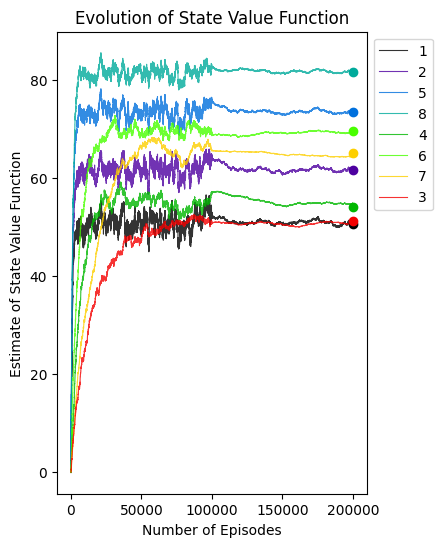

In [ ]:
mc.plot_v_history(target=dp.V)

# Part 2: Comparing Control Methods I

In Part 2, you will compare the performance of Monte Carlo control and Q-learning by running both algorithms on a small environment and then analyzing their progress toward finding the optimal policy and optimal state value function. For the sake of comparison, we will use value iteration to find the optimal policy.

## 2.A - Value Iteration

Create a 3x3 instance of the `FrozenPlatform` environment with `sp_range=[0.2, 0.6]`, a start position of 1 (which is the default), no holes, and with `random_state=1`.

Create an instance of the `DPAgent` class with `gamma=1` and `random_state=1` and use it to run value iteration to find the optimal policy for the environment.

Display the environment, setting `fill` to shade the the cells according to their value under the optimal policy, and setting `contents` to display the optimal policy.


Value Iteration took 28 steps to converge.
Total time required was 0.01 seconds.


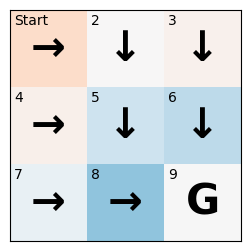

In [ ]:
fp2 = FrozenPlatform(rows=3, cols=3, sp_range=[0.2, 0.6], start=1, holes=0, random_state=1)

dp2 = DPAgent(env=fp2, gamma=1, random_state=1)
dp2.value_iteration()

fp2.display(fill=dp2.V, contents=dp2.policy, size=1)

## 2.B - MC Control

Create an instance of `MCAgent` class for the environment created in Step 2.A, setting `gamma=1` and `random_state=1`. Do **NOT** set a policy for the agent, instead allowing the initial policy to be randomly generated.

Run Monte Carlo control with 20,000 episodes, setting `epsilon=0.1` and `alpha=0.001`. Then calculate the mean absolute difference between the optimal state-value function found by value iteration and the current Monte Carlo estimate. Print the following message with the blank filled in with the appropriate value, rounded to 2 decimal places

    The mean absolute difference in V is ____.

In [ ]:
mc2 = MCAgent(env=fp2, gamma=1, random_state=1)

mc2.control(episodes=20000, epsilon=0.1, alpha=0.001)

mad = mean_abs_diff(dp2.V, mc2.V)

print(f"The mean absolute difference in V is {mad:.2f}.")

The mean absolute difference in V is 5.11.


## 2.C - Display the Policy

Display the environment from 2.A, setting `fill` to shade the the cells according to their value under the policy found by MC control, and set `contents` to display that policy.


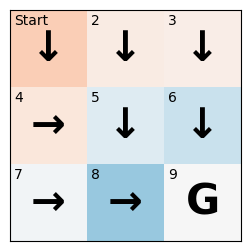

In [ ]:
fp2.display(fill=mc2.V, contents=mc2.policy, size=1)

## 2.D - History Plot

Replace the first blank in the cell below the instance of `MCAgent` created in 2.B. Set the `target` parameter of the method to be equal to the state-value function for the optimal policy (as found by value iteration) and then run this cell to show the history plot for the MC estimate of the state value function.  

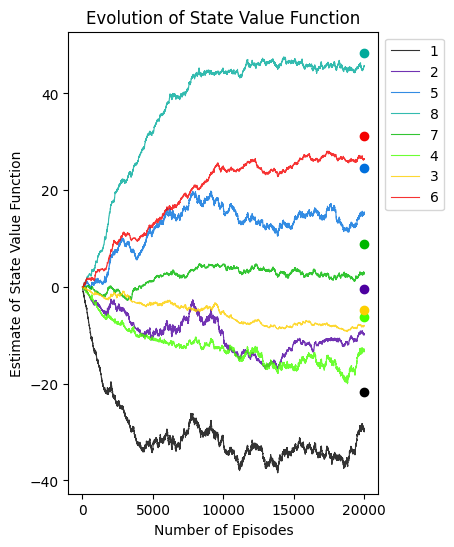

In [ ]:
mc2.plot_v_history(target=dp2.V)

## 2.E - Q-Learning

Create an instance of the `TDAgent` class for the environment created in Step 2.A, setting `gamma=1` and `random_state=1`. Do **NOT** set a policy for the agent, instead allowing the initial policy to be randomly generated.

Run Q-learning with 20,000 episodes, setting `epsilon=0.1` and `alpha=0.001`. Then calculate the mean absolute difference between the optimal state-value function found by value iteration and the current Q-learning estimate. Print the following message with the blank filled in with the appropriate value, rounded to 2 decimal places.

    The mean absolute difference in V is ____.

In [ ]:
td = TDAgent(env=fp2, gamma=1, random_state=1)

td.q_learning(episodes=20000, epsilon=0.1, alpha=0.001)

mad = mean_abs_diff(dp2.V, td.V)

print(f"The mean absolute difference in V is {mad:.2f}.")

The mean absolute difference in V is 0.91.


## 2.F - Display the Policy

Display the environment from 2.A, setting `fill` to shade the the cells according to their value under the policy found by Q-Learning, and set `contents` to display that policy.


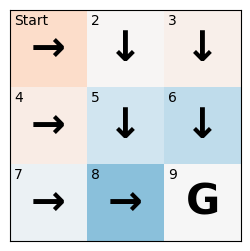

In [ ]:
fp2.display(fill=td.V, contents=td.policy, size=1)

## 2.G - History Plot

Replace the first blank in the cell below the instance of `TDAgent` created in 2.E. Set the `target` parameter of the method to be equal to the state-value function for the optimal policy (as found by value iteration) and then run this cell to show the history plot for the Q-Learning estimate of the state value function.  

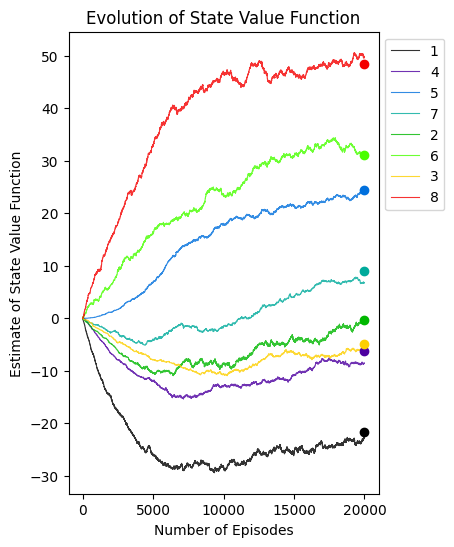

In [ ]:
td.plot_v_history(target=dp2.V)

# Part 3: Succcess Rate Function

In Part 4, you will be frequently asked to use simulation to estimate an agent's success rate under a given policy. To simplify this process, we will create a function to run such a simulation.

## 3.A - Define Function

Please define a function named `success_rate` with five parameters named `env`, `policy`, `episodes`, `max_steps`, and `random_state`. The function should perform the steps described below.

1. Set the NumPy random seed to `random_state`.
2. Create a variable called `goals`, setting it to 0.
3. Run a `for` loop for a number of iterations indicated by the `episodes` parameter. The loop should complete the following steps in each iteration:
  * Generate an episode for the environment instance `env`, following the policy given by the `policy` parameter. To avoid infinite loops, set `max_steps=max_steps`.
  * If the episode resulted in the agent finding the goal, increment `goals`.
4. After the loop completes, calculate and return the observed success rate for the agent.

In [ ]:
def success_rate(env, policy, episodes, max_steps, random_state):
    np.random.seed(random_state)
    goals = 0

    for i in range(episodes):
      epi = env.generate_episode(policy=policy, max_steps=max_steps)
      if epi.state == epi.goal:
        goals += 1

    success_rate = goals / episodes
    return success_rate


## 3.B - Test Function

Test your function by calling it on the `FrozenPlatform` environment from Part 2 along with the opimal policy found for that environment using value iteration. Use 10,000 episodes, set `max_steps=200`, and set `random_state=1`.

Print the message below with the blank filled in with the appropriate value, rounded to 4 decimal places. If your function was implemented correctly, you should get a success rate of 0.4114.

    When following the optimal policy, the agent's success rate was ____.

In [ ]:
rate = success_rate(fp2, dp2.policy, episodes=10000, max_steps=200, random_state=1)

print(f"When following the optimal policy, the agent's success rate was {rate:.4f}.")


When following the optimal policy, the agent's success rate was 0.4114.


# Part 4: Comparing Control Methods II

In Part 4, you will compare the performance of Monte Carlo control and Q-learning by applying multiple rounds of each algorithm to a Frozen Platform environment and then using simulation to estimate the agents' success rates after each round.

## 4.A - Value Iteration

Create a 10x16 instance of the `FrozenPlatform` environment, setting `sp_range=[0.1, 0.4]`, `start=18`, `holes=16`, and `random_state=1`. **Please double check that you have set these parameters as instructed.**

Create an instance of the `DPAgent` class with `gamma=1` and `random_state=1` and use it to run value iteration to find the optimal policy for the environment.

Display the environment, setting `fill` to shade the the cells according to their value under the optimal policy, and setting `contents` to display the optimal policy. Also set `size=2`.


Value Iteration took 65 steps to converge.
Total time required was 0.54 seconds.


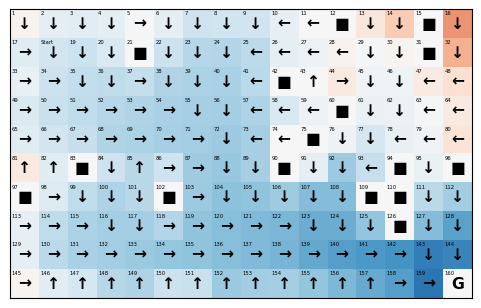

In [ ]:
fp3 = FrozenPlatform(rows=10, cols=16, sp_range=[0.1, 0.4], start=18, holes=16, random_state=1)

dp3 = DPAgent(env=fp3, gamma=1, random_state=1)
dp3.value_iteration()

fp3.display(fill=dp3.V, contents=dp3.policy, size=2)

## 4.B - Success Rate for Optimal Policy

Estimate the success rate when following the optimal policy. Use the `success_rate()` function you created in Part 3. Pass the function the environment from Step 4.A and the optimal policy found using value iteration. Set `episodes=10,000`, `max_steps=200`, and `random_state=1`.

Print the following message with the blank filled in with the appropriate value, rounded to 4 decimal places.

    When following the optimal policy, the agent's success rate was ____.


In [ ]:
rate = success_rate(env=fp3, policy=dp3.policy, episodes=10000, max_steps=200, random_state=1)

print(f"When following the optimal policy, the agent's success rate was {rate:.4f}.")

When following the optimal policy, the agent's success rate was 0.7632.


## 4.C - MC Control

You will now apply several rounds of Monte Carlo control, estimating the agent's success rate after each round. Starter code has been provided to you in this step. Please complete it according to the following instructions.

The code should run 10 rounds of Monte Carlo control, each consisting of 5000 episodes with `alpha=0.01` and `max_steps=200`. The value of `epsilon` should be 0.1 during the first round, and should change by a multiple of 0.1 in each subsequent round. Experiment with `exploring_starts=True` and `exploring_starts=False`, selecting the version that generates the best results.

After each round of Monte Carlo control, `success_rate()` should be called to estimate the Monte Carlo agent's current success rate, setting `episodes=1000` and `max_steps=200`. At the end of each iteration of the loop, the following message should be printed with the blanks filled in with the appropriate values, and with the success rate rounded to 3 decimal places.

    After ____ episodes, the MC agent's success rate was ____.

In [ ]:
mc = MCAgent(env=fp3, gamma=1, random_state=1)

s_rates_1 = []

for i in range(1, 11):
    num_eps = 5000

    mc.control(episodes=num_eps, epsilon=10**(-i), alpha=0.01, max_steps=200, exploring_starts=True)

    sr = success_rate(env=fp3, policy=mc.policy, episodes=1000, max_steps=200, random_state=i)
    s_rates_1.append(sr)

    print(f"After {i * num_eps} episodes, the MC agent's success rate was {sr:.3f}.")

After 5000 episodes, the MC agent's success rate was 0.173.
After 10000 episodes, the MC agent's success rate was 0.562.
After 15000 episodes, the MC agent's success rate was 0.519.
After 20000 episodes, the MC agent's success rate was 0.569.
After 25000 episodes, the MC agent's success rate was 0.604.
After 30000 episodes, the MC agent's success rate was 0.552.
After 35000 episodes, the MC agent's success rate was 0.579.
After 40000 episodes, the MC agent's success rate was 0.615.
After 45000 episodes, the MC agent's success rate was 0.588.
After 50000 episodes, the MC agent's success rate was 0.596.


## 4.D - Success Rate Plot

Use Matplotlib to create a line plot showing the progress in the success rate for the Monte Carlo agent. The y-values for the line plot should come from the success rate list created in the previous cell. The x-values should be the corresponding number of episodes. The figure should also have the following characteristics.

* A figsize of `[4,3]`.
* The title should read "MC Agent Success Rate".
* The x and y axes should be labeled "Number of Episodes" and "Success Rate", respectively.
* Add a grid to your plot.

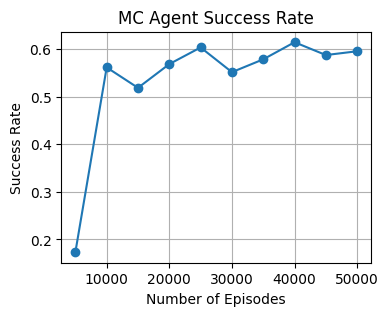

In [ ]:
episodes = [i * 5000 for i in range(1, 11)]

plt.figure(figsize=[4,3])
plt.plot(episodes, s_rates_1, marker='o', linestyle='-')
plt.title("MC Agent Success Rate")
plt.xlabel("Number of Episodes")
plt.ylabel("Success Rate")
plt.grid(True)
plt.show()

## 4.E - Display Policy

Calculate the mean absolute difference between the optimal state-value function and the current estimate produced by Monte Carlo control. Print the message shown below with the blank filled in with the appropriate value, rounded to 2 decimal places.

    The mean absolute difference in V is ____.


Display the environment from 4.A, setting `fill` to shade the the cells according to their value under the policy found by MC control, and set `contents` to display that policy. When calling display(), set `size=2` and `show_nums=False`.



The mean absolute difference in V is 26.45.


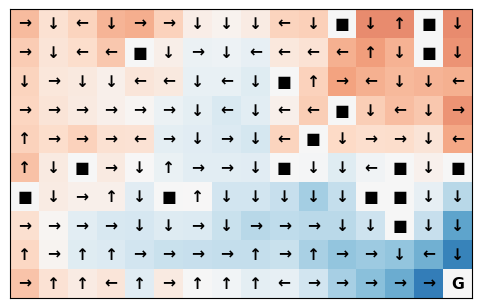

In [ ]:
mad = mean_abs_diff(dp3.V, mc.V)

print(f"The mean absolute difference in V is {mad:.2f}.")

fp3.display(fill=mc.V, contents=mc.policy, size=2, show_nums=False)

## 4.F - Q-Learning

Starter code has been provided in the cell below. Complete this code to repeat the process outline in Step 4.C, but using Q-learning insteasd of MC Control. The process is identical to that described in Step 4,C, with two exceptions:
1. You will use Q-learning instead of MC control.
2. The characters "MC" in the output should be replaced with "TD".

In [ ]:
td = TDAgent(env=fp3, gamma=1, random_state=1)

s_rates_2 = []
for i in range(1,11):
    num_eps = 5000

    td.q_learning(episodes=num_eps, epsilon=10**(-i), alpha=0.01, exploring_starts=True)

    sr = success_rate(env=fp3, policy=td.policy, episodes=1000, max_steps=200, random_state=i)
    s_rates_2.append(sr)

    print(f"After {i * num_eps} episodes, the TD agent's success rate was {sr:.3f}.")

After 5000 episodes, the TD agent's success rate was 0.010.
After 10000 episodes, the TD agent's success rate was 0.419.
After 15000 episodes, the TD agent's success rate was 0.645.
After 20000 episodes, the TD agent's success rate was 0.670.
After 25000 episodes, the TD agent's success rate was 0.687.
After 30000 episodes, the TD agent's success rate was 0.681.
After 35000 episodes, the TD agent's success rate was 0.700.
After 40000 episodes, the TD agent's success rate was 0.676.
After 45000 episodes, the TD agent's success rate was 0.709.
After 50000 episodes, the TD agent's success rate was 0.675.


## 4.G - Success Rate Plot

Repeat the steps outlined in Step 4.D, but using the list created for Q-Learning in 4.F instead. The title of this figure should be "TD Agent Success Rate".

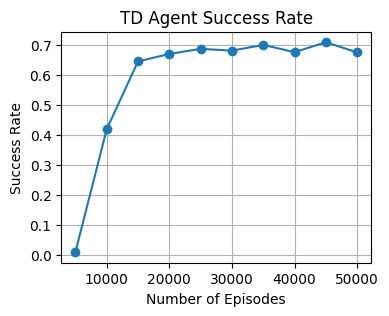

In [ ]:
episodes = [i * 5000 for i in range(1, 11)]

plt.figure(figsize=[4,3])
plt.plot(episodes, s_rates_2, marker='o', linestyle='-')
plt.title("TD Agent Success Rate")
plt.xlabel("Number of Episodes")
plt.ylabel("Success Rate")
plt.grid(True)
plt.show()

## 4.H - Display Policy

Repeat the steps outlined in Step 4.E, but using the policy and state-value function estimates found using Q-learning rather than those found by Monte Carlo control.

The mean absolute difference in V is 12.50.


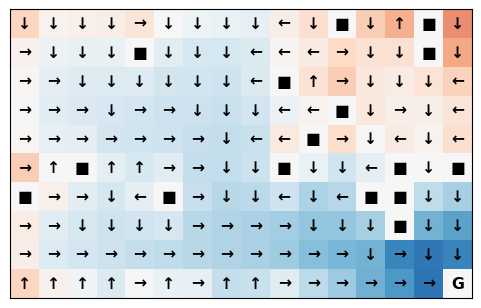

In [ ]:
mad = mean_abs_diff(dp3.V, td.V)

print(f"The mean absolute difference in V is {mad:.2f}.")

fp3.display(fill=td.V, contents=td.policy, size=2, show_nums=False)

# Submission Instructions

1. Perform a Restart and Run All by clicking **Tools > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
